# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
from jupyterthemes import jtplot
jtplot.style()

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import my_functions as mf

In [2]:
%load_ext autoreload
%autoreload 1
%aimport my_functions

In [3]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
for colname in df.columns:
    print(colname)
df.head()

piece_count
list_price
num_reviews
play_star_rating
star_rating
val_star_rating
ages_10+
ages_10-14
ages_10-16
ages_10-21
ages_11-16
ages_12+
ages_12-16
ages_14+
ages_16+
ages_1½-3
ages_1½-5
ages_2-5
ages_4+
ages_4-7
ages_4-99
ages_5+
ages_5-12
ages_5-8
ages_6+
ages_6-12
ages_6-14
ages_7+
ages_7-12
ages_7-14
ages_8+
ages_8-12
ages_8-14
ages_9+
ages_9-12
ages_9-14
ages_9-16
theme_name_Angry Birds™
theme_name_Architecture
theme_name_BOOST
theme_name_Blue's Helicopter Pursuit
theme_name_BrickHeadz
theme_name_Carnotaurus Gyrosphere Escape
theme_name_City
theme_name_Classic
theme_name_Creator 3-in-1
theme_name_Creator Expert
theme_name_DC Comics™ Super Heroes
theme_name_DC Super Hero Girls
theme_name_DIMENSIONS™
theme_name_DUPLO®
theme_name_Dilophosaurus Outpost Attack
theme_name_Disney™
theme_name_Elves
theme_name_Friends
theme_name_Ghostbusters™
theme_name_Ideas
theme_name_Indoraptor Rampage at Lockwood Estate
theme_name_Juniors
theme_name_Jurassic Park Velociraptor Chase
theme_name_MINDS

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [4]:
# Your code here - Manipulate column names
df.columns = [x.replace(' ','_') for x in df.columns]
df.columns = [x.replace('½','_and_a_half') for x in df.columns]
df.columns = [x.replace('+','andup') for x in df.columns]
df.columns = [x.replace('-in-','in') for x in df.columns]
df.columns = [x.replace('-','to') for x in df.columns]
df.columns = [x.translate({ord(c): '' for c in "!@#$%^&*()[]{};:,./<>?\|`~=_+™®'"}) for x in df.columns]
for colname in df.columns:
    print(colname)

piececount
listprice
numreviews
playstarrating
starrating
valstarrating
ages10andup
ages10to14
ages10to16
ages10to21
ages11to16
ages12andup
ages12to16
ages14andup
ages16andup
ages1andahalfto3
ages1andahalfto5
ages2to5
ages4andup
ages4to7
ages4to99
ages5andup
ages5to12
ages5to8
ages6andup
ages6to12
ages6to14
ages7andup
ages7to12
ages7to14
ages8andup
ages8to12
ages8to14
ages9andup
ages9to12
ages9to14
ages9to16
themenameAngryBirds
themenameArchitecture
themenameBOOST
themenameBluesHelicopterPursuit
themenameBrickHeadz
themenameCarnotaurusGyrosphereEscape
themenameCity
themenameClassic
themenameCreator3in1
themenameCreatorExpert
themenameDCComicsSuperHeroes
themenameDCSuperHeroGirls
themenameDIMENSIONS
themenameDUPLO
themenameDilophosaurusOutpostAttack
themenameDisney
themenameElves
themenameFriends
themenameGhostbusters
themenameIdeas
themenameIndoraptorRampageatLockwoodEstate
themenameJuniors
themenameJurassicParkVelociraptorChase
themenameMINDSTORMS
themenameMarvelSuperHeroes
themenameM

Linear Regression for listprice~piececount+numreviews+playstarrating+starrating+valstarrating+ages10andup+ages10to14+ages10to16+ages10to21+ages11to16+ages12andup+ages12to16+ages14andup+ages16andup+ages1andahalfto3+ages1andahalfto5+ages2to5+ages4andup+ages4to7+ages4to99+ages5andup+ages5to12+ages5to8+ages6andup+ages6to12+ages6to14+ages7andup+ages7to12+ages7to14+ages8andup+ages8to12+ages8to14+ages9andup+ages9to12+ages9to14+ages9to16+themenameAngryBirds+themenameArchitecture+themenameBOOST+themenameBluesHelicopterPursuit+themenameBrickHeadz+themenameCarnotaurusGyrosphereEscape+themenameCity+themenameClassic+themenameCreator3in1+themenameCreatorExpert+themenameDCComicsSuperHeroes+themenameDCSuperHeroGirls+themenameDIMENSIONS+themenameDUPLO+themenameDilophosaurusOutpostAttack+themenameDisney+themenameElves+themenameFriends+themenameGhostbusters+themenameIdeas+themenameIndoraptorRampageatLockwoodEstate+themenameJuniors+themenameJurassicParkVelociraptorChase+themenameMINDSTORMS+themenameMarvel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:05:34   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.2821      1.551     41.435      0.000      61.241      67.323
piececount                                    75.7184      0.776     97.605      0.000      74.198      77.239
numreviews                                     6.4270      0.590     10.888      0.000       5.270       7.584
playstarrating                                 5.2682      0.542      9.717      0.000       4.205       6.331
starrating                                    -1.4380      0.617     -2.331      0.020      -2.647      -0.229
valstarrating                                 -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages10andup                                  122.9923      5.753     21.378      0.000     111.715     134.270
ages10to14                                   -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages10to16                                   -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages10to21                                    55.9674      6.415      8.725      0.000      43.393      68.542
ages11to16                                   -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages12andup                                   70.5837      4.828     14.619      0.000      61.119      80.048
ages12to16                                   -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages14andup                                   24.6493      3.579      6.887      0.000      17.634      31.665
ages16andup                                   32.9512      5.251      6.275      0.000      22.658      43.245
ages1andahalfto3                              -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages1andahalfto5                              -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages2to5                                      14.9724      1.459     10.260      0.000      12.112      17.833
ages4andup                                   -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages4to7                                      -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages4to99                                     -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages5andup                                    -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages5to12                                    -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages5to8                                       6.4648      5.248      1.232      0.218      -3.822      16.752
ages6andup                                   -27.0254      4.920     -5.493      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,100.318,0


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.436277 
 0.609947 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 994.923772 
 0.787

Skew: 1.6739211762761317
Kurtosis: 36.45251395633384


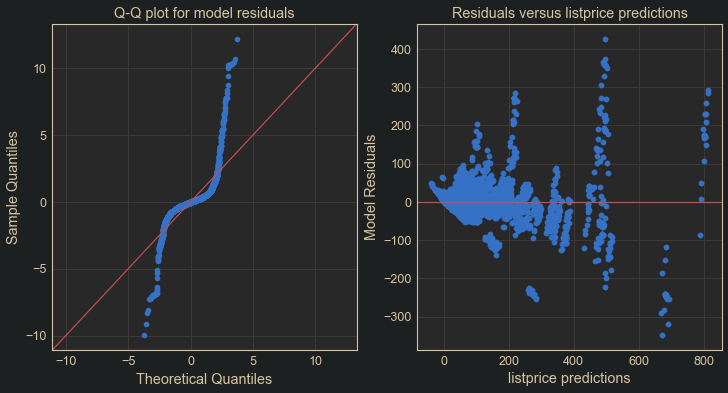

In [5]:
# Your code here - Define the target and predictors
target = 'listprice'
features = [x for x in df.columns if x not in ['listprice']]

# Running a test regression to make sure column names are working
mf.do_a_linreg(df, features, target)

In [6]:
# Your code here - Split into train and test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=3)

Linear Regression for listprice~piececount+numreviews+playstarrating+starrating+valstarrating+ages10andup+ages10to14+ages10to16+ages10to21+ages11to16+ages12andup+ages12to16+ages14andup+ages16andup+ages1andahalfto3+ages1andahalfto5+ages2to5+ages4andup+ages4to7+ages4to99+ages5andup+ages5to12+ages5to8+ages6andup+ages6to12+ages6to14+ages7andup+ages7to12+ages7to14+ages8andup+ages8to12+ages8to14+ages9andup+ages9to12+ages9to14+ages9to16+themenameAngryBirds+themenameArchitecture+themenameBOOST+themenameBluesHelicopterPursuit+themenameBrickHeadz+themenameCarnotaurusGyrosphereEscape+themenameCity+themenameClassic+themenameCreator3in1+themenameCreatorExpert+themenameDCComicsSuperHeroes+themenameDCSuperHeroGirls+themenameDIMENSIONS+themenameDUPLO+themenameDilophosaurusOutpostAttack+themenameDisney+themenameElves+themenameFriends+themenameGhostbusters+themenameIdeas+themenameIndoraptorRampageatLockwoodEstate+themenameJuniors+themenameJurassicParkVelociraptorChase+themenameMINDSTORMS+themenameMarvel

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     537.3
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:06:08   Log-Likelihood:                -40593.
No. Observations:                8152   AIC:                         8.138e+04
Df Residuals:                    8057   BIC:                         8.204e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     63.3135      1.956     32.376      0.000      59.480      67.147
piececount                                    73.5201      0.892     82.382      0.000      71.771      75.270
numreviews                                     6.0285      0.678      8.893      0.000       4.700       7.357
playstarrating                                 5.4077      0.646      8.369      0.000       4.141       6.674
starrating                                    -1.1732      0.722     -1.624      0.104      -2.589       0.243
valstarrating                                 -8.9082      0.639    -13.940      0.000     -10.161      -7.656
ages10andup                                  113.2019      6.796     16.657      0.000      99.880     126.524
ages10to14                                   -24.8106      9.928     -2.499      0.012     -44.271      -5.350
ages10to16                                    -7.6331      4.136     -1.845      0.065     -15.741       0.475
ages10to21                                    61.5236      7.579      8.118      0.000      46.667      76.380
ages11to16                                   -22.8383      5.814     -3.928      0.000     -34.236     -11.441
ages12andup                                   73.6091      5.704     12.904      0.000      62.427      84.791
ages12to16                                   -54.9566      6.836     -8.039      0.000     -68.357     -41.556
ages14andup                                   30.5342      4.250      7.184      0.000      22.203      38.866
ages16andup                                   42.3288      6.091      6.950      0.000      30.389      54.268
ages1andahalfto3                              -8.8602      2.478     -3.575      0.000     -13.718      -4.003
ages1andahalfto5                              -5.4397      3.010     -1.807      0.071     -11.340       0.460
ages2to5                                      14.8078      1.705      8.682      0.000      11.465      18.151
ages4andup                                   -18.3795      6.200     -2.964      0.003     -30.534      -6.225
ages4to7                                      -6.7791      3.232     -2.098      0.036     -13.114      -0.444
ages4to99                                     -3.3654      3.560     -0.945      0.345     -10.344       3.613
ages5andup                                   -10.5944      3.080     -3.440      0.001     -16.632      -4.557
ages5to12                                    -37.2710      3.320    -11.226      0.000     -43.779     -30.763
ages5to8                                       5.8140      5.752      1.011      0.312      -5.461      17.089
ages6andup                                   -28.6395      5.693     -5.031      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,105.629,0


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.435415 
 0.60564 
 
 
 p-value 
 0.000000 
 0.00000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 741.303682 
 0.787

Skew: 2.0580072140145234
Kurtosis: 38.22052941436987


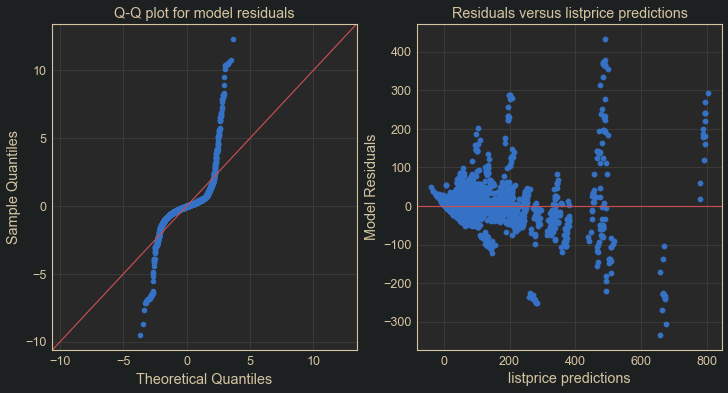

In [7]:
# Your code here - Fit the actual model
train_df = pd.concat([X_train, y_train], axis=1)
lm = mf.do_a_linreg(train_df, features, target)

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [8]:
# Your code here - Remove features which do not appear to be statistically relevant
significant = mf.stepwise_selection(X_train, y_train, threshold_in=0.05)

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  numreviews                     with p-value 0.0
Add  themenameSERIOUSPLAY           with p-value 0.0
Add  reviewdifficultyChallenging    with p-value 0.0
Add  piececount                     with p-value 0.0
Drop numreviews                     with p-value 0.47792
Add  themenameCreatorExpert         with p-value 1.05738e-117
Add  themenameMINDSTORMS            with p-value 9.1597e-98
Add  valstarrating                  with p-value 7.00789e-73
Add  ages2to5                       with p-value 1.52736e-66
Add  themenameStarWars              with p-value 1.46491e-34
Add  reviewdifficultyAverage        with p-value 1.77864e-39
Add  ages14andup                    with p-value 3.4439e-21
Add  playstarrating                 with p-value 2.15259e-22
Add  themenameBOOST                 with p-value 4.1253e-18
Add  ages16andup                    with p-value 7.19436e-16
Add  countryCA                      with p-value 1.33697e-12
Add  countryUS                      with p-value 3.35091e-13
A

Linear Regression for listprice~themenameSERIOUSPLAY+reviewdifficultyChallenging+piececount+themenameCreatorExpert+valstarrating+ages2to5+themenameStarWars+reviewdifficultyAverage+ages14andup+playstarrating+themenameBOOST+ages16andup+countryCA+countryUS+countryDN+ages12to16+themenameTHELEGONINJAGOMOVIE+themenameIndoraptorRampageatLockwoodEstate+countryFI+themenameIdeas+numreviews+ages10andup+themenameBrickHeadz+themenameClassic+themenameFriends+themenameGhostbusters+themenameCreator3in1+ages9andup+ages10to21+themenameNINJAGO+themenameCarnotaurusGyrosphereEscape+countryNO+themenameElves+themenameArchitecture+ages12andup+ages5to12+themenameCity+ages9to14+countryAU+themenameNEXOKNIGHTS+themenameTrexTransport+ages6to12+themenameTechnic+ages10to16+ages5andup+themenameMinifigures+themenameMinecraft+ages8andup+themenameMINDSTORMS+ages6to14+ages6andup+themenameSpeedChampions+themenameTHELEGOBATMANMOVIE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     969.3
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:09:52   Log-Likelihood:                -40618.
No. Observations:                8152   AIC:                         8.134e+04
Df Residuals:                    8099   BIC:                         8.171e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.2899      1.126     57.083      0.000      62.082      66.498
themenameSERIOUSPLAY                         238.1430      7.247     32.862      0.000     223.937     252.349
reviewdifficultyChallenging                   17.4329      2.046      8.519      0.000      13.422      21.444
piececount                                    73.1742      0.809     90.462      0.000      71.589      74.760
themenameCreatorExpert                      -133.5300      4.936    -27.051      0.000    -143.206    -123.854
valstarrating                                 -9.4962      0.510    -18.611      0.000     -10.496      -8.496
ages2to5                                      21.8976      1.764     12.413      0.000      18.440      25.356
themenameStarWars                              5.8689      1.500      3.913      0.000       2.929       8.809
reviewdifficultyAverage                       13.3087      1.034     12.867      0.000      11.281      15.336
ages14andup                                   49.7850      4.021     12.380      0.000      41.902      57.668
playstarrating                                 4.9622      0.540      9.198      0.000       3.905       6.020
themenameBOOST                                79.5459     10.366      7.674      0.000      59.226      99.866
ages16andup                                   61.3233      6.125     10.013      0.000      49.317      73.329
countryCA                                    -12.3227      1.612     -7.645      0.000     -15.482      -9.163
countryUS                                    -12.1176      1.570     -7.719      0.000     -15.195      -9.040
countryDN                                    -12.8224      1.925     -6.662      0.000     -16.595      -9.050
ages12to16                                   -36.9932      6.801     -5.439      0.000     -50.325     -23.662
themenameTHELEGONINJAGOMOVIE                 -26.4412      2.501    -10.571      0.000     -31.345     -21.538
themenameIndoraptorRampageatLockwoodEstate    51.4106      9.929      5.178      0.000      31.947      70.875
countryFI                                     10.8688      1.912      5.684      0.000       7.121      14.617
themenameIdeas                              -131.7909      6.622    -19.903      0.000    -144.771    -118.810
numreviews                                     5.5784      0.623      8.955      0.000       4.357       6.799
ages10andup                                  129.9308      7.530     17.255      0.000     115.170     144.691
themenameBrickHeadz                         -135.8620      7.806    -17.405      0.000    -151.164    -120.560
themenameClassic                             -19.1714      2.460     -7.792      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,95.5409,0


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.444758 
 0.608583 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 730.878204 
 0.787

Skew: 2.0535631575271
Kurtosis: 37.84283147184554


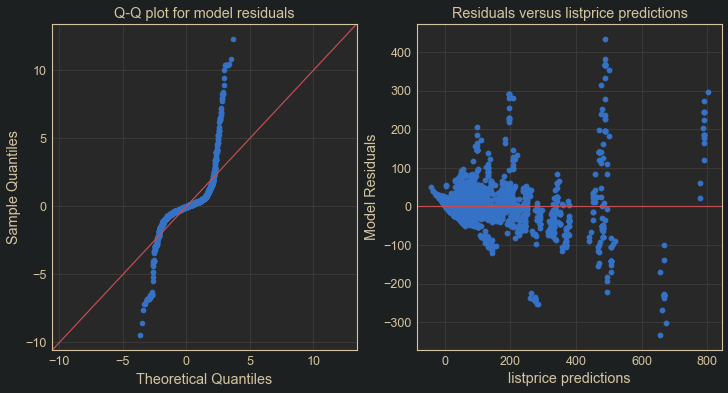

In [9]:
# Your code here - Refit the model
lm = mf.do_a_linreg(train_df, significant, target)

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [124]:
# Your code here - Continue to refine the model
# This was handled iteratively with the stepwise_selection() function used above

In [125]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [10]:
# Your code here - Code a way to identify multicollinearity
X = train_df[significant]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs = list(zip(significant, vif))
high_vifs = [x for x in vifs if x[1] > 5]
high_vifs

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('ages16andup', 8.788269299127146),
 ('ages10andup', 18.400853785891623),
 ('themenameBrickHeadz', 15.580566672889764),
 ('ages10to21', 7.699281907035284),
 ('themenameArchitecture', 5.77099009337466),
 ('ages12andup', 6.963628277868796),
 ('ages5andup', inf),
 ('themenameMinifigures', inf),
 ('themenameMINDSTORMS', 10.013812299141755)]

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [11]:
# Your code here - Subset features based on multicollinearity
remove = [x[0] for x in high_vifs]
new_features = [x for x in significant if x not in remove]

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  reviewdifficultyChallenging    with p-value 0.0
Add  themenameSERIOUSPLAY           with p-value 0.0
Add  piececount                     with p-value 0.0
Add  themenameCreatorExpert         with p-value 1.05738e-117
Add  valstarrating                  with p-value 1.04018e-79
Add  ages2to5                       with p-value 4.81097e-55
Add  playstarrating                 with p-value 6.33869e-34
Add  reviewdifficultyAverage        with p-value 5.89841e-27
Add  themenameStarWars              with p-value 1.5291e-28
Add  ages14andup                    with p-value 2.94166e-23
Add  themenameBOOST                 with p-value 6.88544e-17
Add  ages12to16                     with p-value 6.02476e-13
Add  countryCA                      with p-value 5.37265e-13
Add  countryUS                      with p-value 1.51494e-14
Add  themenameTHELEGONINJAGOMOVIE   with p-value 1.12201e-10
Add  themenameFriends               with p-value 3.65211e-11
Add  countryDN                      with p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1178.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:11:56   Log-Likelihood:                -41038.
No. Observations:                8152   AIC:                         8.215e+04
Df Residuals:                    8113   BIC:                         8.243e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     69.5436      0.970     71.662      0.000      67.641      71.446
reviewdifficultyChallenging                   26.9993      2.043     13.219      0.000      22.995      31.003
themenameSERIOUSPLAY                         222.3426      7.421     29.963      0.000     207.796     236.889
piececount                                    77.0480      0.660    116.802      0.000      75.755      78.341
themenameCreatorExpert                       -88.6308      3.309    -26.782      0.000     -95.118     -82.144
valstarrating                                -11.3495      0.498    -22.786      0.000     -12.326     -10.373
ages2to5                                      18.6209      1.760     10.578      0.000      15.170      22.072
playstarrating                                 6.5255      0.503     12.978      0.000       5.540       7.511
reviewdifficultyAverage                       12.4188      1.004     12.374      0.000      10.451      14.386
themenameStarWars                              3.4219      1.443      2.371      0.018       0.593       6.250
ages14andup                                   24.9318      3.665      6.802      0.000      17.747      32.116
themenameBOOST                                74.0635     10.857      6.822      0.000      52.782      95.345
ages12to16                                   -53.1377      6.831     -7.779      0.000     -66.529     -39.747
countryCA                                    -12.6323      1.695     -7.454      0.000     -15.954      -9.310
countryUS                                    -12.5947      1.650     -7.633      0.000     -15.829      -9.360
themenameTHELEGONINJAGOMOVIE                 -25.5696      2.393    -10.687      0.000     -30.260     -20.879
themenameFriends                             -13.8417      2.159     -6.412      0.000     -18.073      -9.610
countryDN                                    -12.1187      2.024     -5.988      0.000     -16.086      -8.151
themenameIdeas                               -40.0026      4.072     -9.823      0.000     -47.985     -32.020
numreviews                                     4.7715      0.605      7.888      0.000       3.586       5.957
themenameClassic                             -22.3732      2.500     -8.950      0.000     -27.273     -17.473
themenameCreator3in1                         -16.9683      2.282     -7.435      0.000     -21.442     -12.495
themenameNINJAGO                             -21.3499      2.796     -7.637      0.000     -26.830     -15.870
ages5to12                                    -20.2175      2.382     -8.488      0.000     -24.887     -15.548
themenameTechnic                             -15.4534      2.108     -7.331      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,82.3679,0


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.469537 
 0.601277 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 735.314436 
 0.787

Skew: 2.7262079352322455
Kurtosis: 38.70470695797417


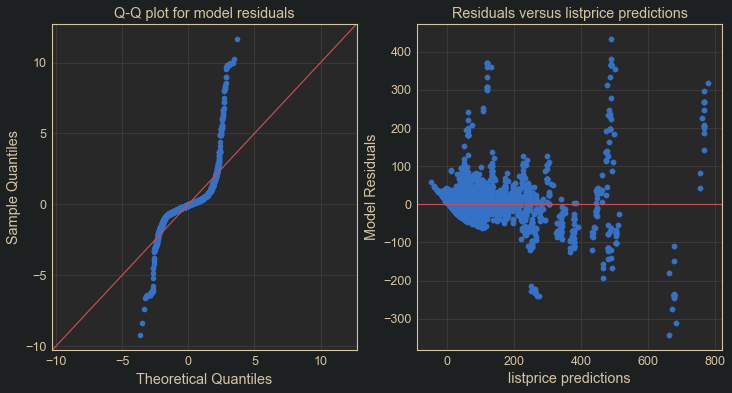

In [14]:
# Your code here - Refit model with subset features
new_significant = mf.stepwise_selection(X_train[new_features].copy(), 
                                        y_train, 
                                        threshold_in=0.05)
lm = mf.do_a_linreg(train_df, new_significant, target)

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [ ]:
# Your code here - Check that the residuals are normally distributed
# The do_a_linreg() function above produced a Q-Q plot, normality test results, and
# homoscedasticity test results.
# Reviewing these, we can see that the null hypothesis of normally distributed residuals is 
# rejected by the Shapiro-Wilk and Anderson-Darling tests, as well as by visual inspection of
# the Q-Q plot of residuals.

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
# Your code here - Check that the residuals are homoscedastic
# The null hypothesis of homoscedastic residuals is rejected by the Goldfeld-Quandt test,
# with a p-value of near 0, meaning it is safe to assume the residuals are not homoscedastic.
# Also, a distinct funnel shape can be observed in the plot of residuals over the predictions.

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

Variable: listprice
Normality Test Results for ['listprice']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 listprice 
 Statistic 
 0.998195 
 0.550099 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 listprice 
 990.95812 
 0.787

count    8152.000000
mean       67.428109
std        94.855967
min         2.272400
25%        21.947800
50%        36.587800
75%        73.151200
max      1097.939000
Name: listprice, dtype: float64

Skew: 4.657366237657033
Kurtosis: 31.097055364028165


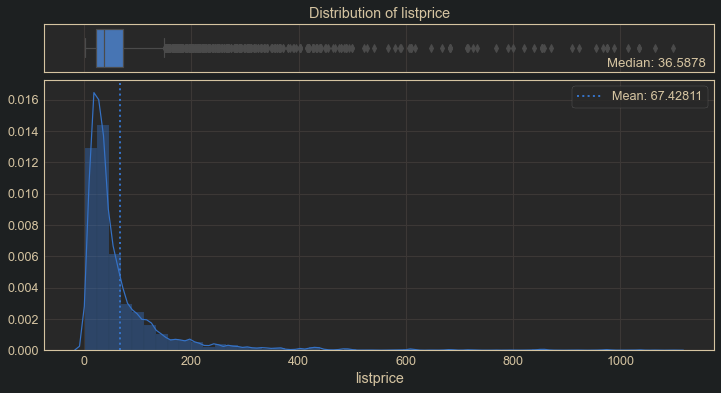

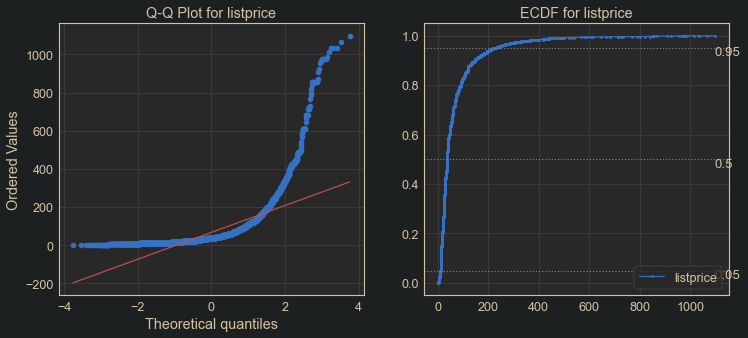

In [15]:
# Your code here - Check for outliers
mf.visualize_distribution(train_df, 'listprice')

In [16]:
# I can see heavy positive skew on the target variable, a log or other transformation would
# help with this, I will try such transformations now.
train_df['listprice_log'] = np.log(train_df['listprice'])

Variable: listprice_log
Normality Test Results for ['listprice_log']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 listprice_log 
 Statistic 
 0.962357 
 9.860422e-01 
 
 
 p-value 
 0.000000 
 1.406274e-27 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 listprice_log 
 35.338052 
 0.787

count    8152.000000
mean        3.708195
std         0.944550
min         0.820837
25%         3.088667
50%         3.599715
75%         4.292528
max         7.001190
Name: listprice_log, dtype: float64

Skew: 0.41660742294973896
Kurtosis: 0.17316656131438535


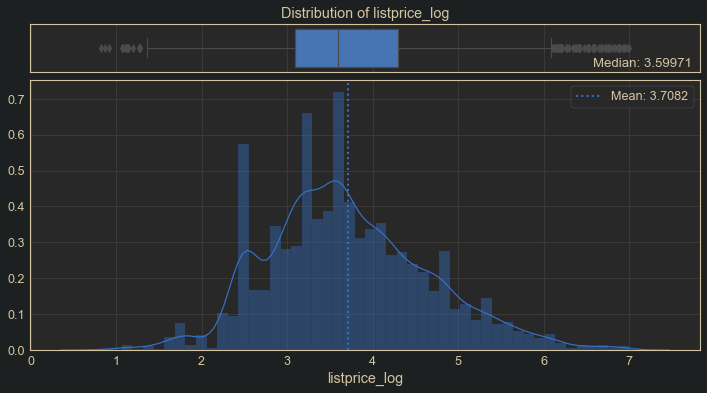

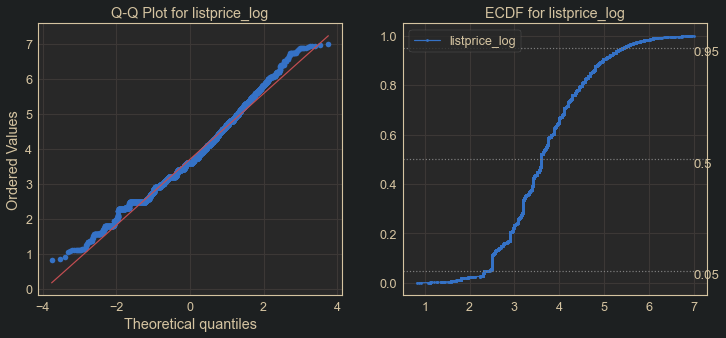

In [17]:
mf.visualize_distribution(train_df, 'listprice_log')

Variable: listprice_sqrt
Normality Test Results for ['listprice_sqrt']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 listprice_sqrt 
 Statistic 
 0.98238 
 0.823754 
 
 
 p-value 
 0.00000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 listprice_sqrt 
 354.174819 
 0.787

count    8152.000000
mean        7.192759
std         3.961598
min         1.507448
25%         4.684848
50%         6.048785
75%         8.552847
max        33.135163
Name: listprice_sqrt, dtype: float64

Skew: 2.071314585048069
Kurtosis: 6.302985884933502


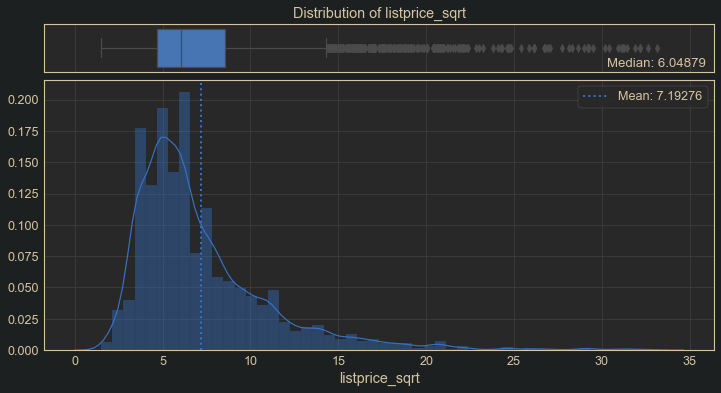

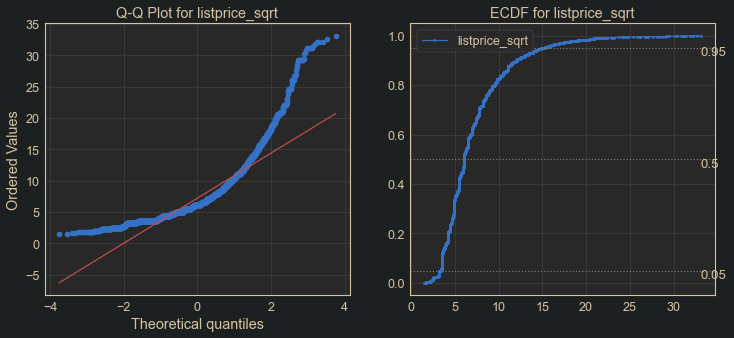

In [18]:
# This is much better, but as the test results indicate, unlikely to be normally distributed
# I will now try a square root transformation
train_df['listprice_sqrt'] = train_df['listprice'] ** (1/2)
mf.visualize_distribution(train_df, 'listprice_sqrt')

Variable: listprice_4rt
Normality Test Results for ['listprice_4rt']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 listprice_4rt 
 Statistic 
 0.935131 
 0.928011 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 listprice_4rt 
 148.128523 
 0.787

count    8152.000000
mean        2.600898
std         0.654326
min         1.227782
25%         2.164451
50%         2.459428
75%         2.924525
max         5.756315
Name: listprice_4rt, dtype: float64

Skew: 1.1660335703030063
Kurtosis: 1.8795245080394238


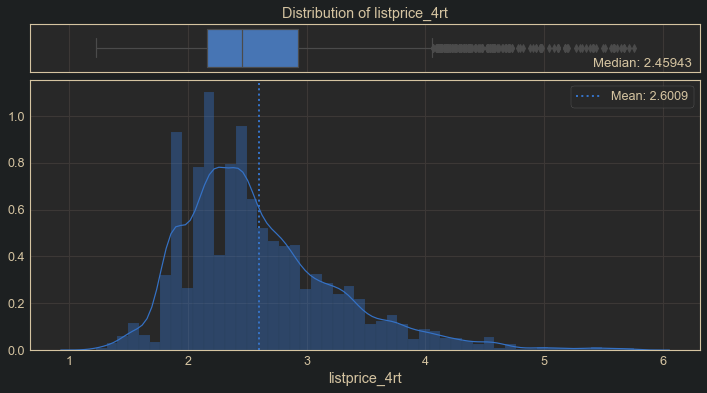

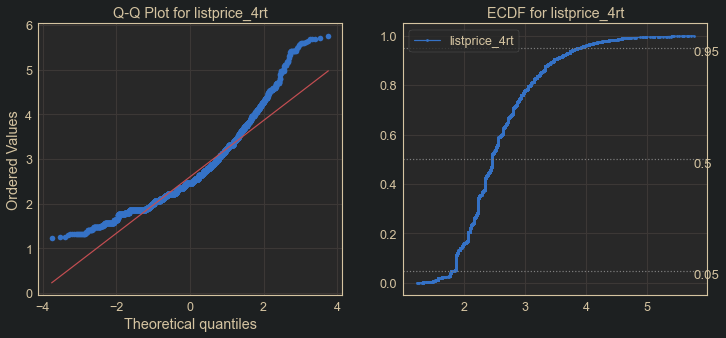

In [19]:
# This left too much positive skew, I will try a stronger 4th root transformation
train_df['listprice_4rt'] = train_df['listprice'] ** (1/4)
mf.visualize_distribution(train_df, 'listprice_4rt')

In [20]:
# The log transformation performed the best in normalizing this target variable, but there was
# still an issue with outliers.

Length of old DataFrame: 8152
Length of Tukey trimmed DataFrame 8046
Variable: listprice_log
Normality Test Results for ['listprice_log']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 listprice_log 
 Statistic 
 0.964745 
 9.872784e-01 
 
 
 p-value 
 0.000000 
 2.905118e-26 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 listprice_log 
 30.257359 
 0.787

count    8046.000000
mean        3.686114
std         0.895825
min         1.358975
25%         3.088667
50%         3.599715
75%         4.266868
max         6.089013
Name: listprice_log, dtype: float64

Skew: 0.3096388131933736
Kurtosis: -0.24338798095094427


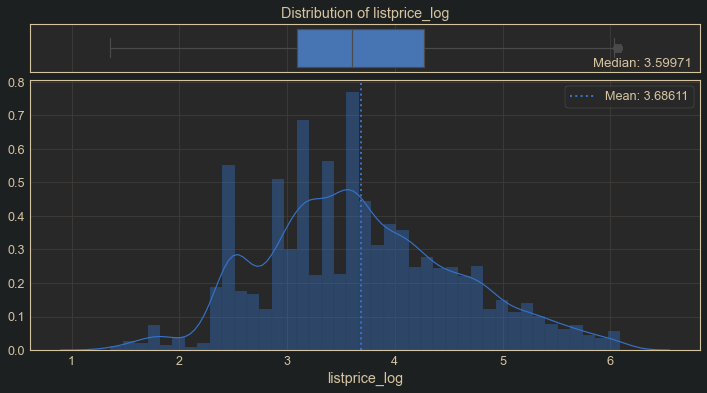

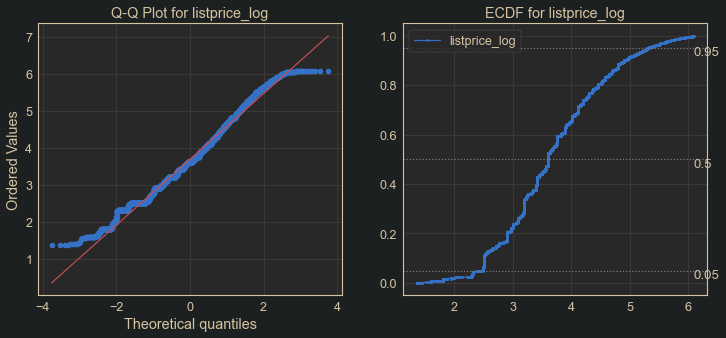

In [21]:
# Your code here
# Remove extreme outliers
# My preference is to use the tukey fence method of removing outliers, which uses the IQR to
# determine what outliers are extreme and remove them using the scikit_posthoc.outliers_iqr()
# function. The standard approach is to remove any data points that are more than 1.5 IQR below
# first quartile, or above the third quartile
trimmed_train_df = mf.tukey_trim(train_df, 'listprice_log')
mf.visualize_distribution(trimmed_train_df, 'listprice_log')

In [40]:
# This is closer to normality than without removing the outliers, though not by much. There
# were just over 100 rows dropped in the tukey_trim() method of outlier removal
# Rerun the model
# Due to the adjustments, I will also retest for significance of predictors
features = [x for x in trimmed_train_df.columns if x not in ['listprice_log',
                                                             'listprice',
                                                             'listprice_sqrt',
                                                             'listprice_4rt']]
X = trimmed_train_df[features].copy()
y = trimmed_train_df['listprice_log'].copy()
new_significant = mf.stepwise_selection(X, 
                                        y, 
                                        threshold_in=0.05)

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal

Add  reviewdifficultyChallenging    with p-value 0.0
Add  reviewdifficultyAverage        with p-value 0.0
Add  piececount                     with p-value 0.0
Add  themenameBrickHeadz            with p-value 2.6925e-91
Add  valstarrating                  with p-value 2.30102e-68
Add  reviewdifficultyVeryEasy       with p-value 3.76452e-75
Add  ages2to5                       with p-value 9.35398e-72
Add  themenameStarWars              with p-value 1.02247e-55
Add  themenameMINDSTORMS            with p-value 5.94626e-66
Add  ages16andup                    with p-value 4.95235e-45
Add  ages5andup                     with p-value 2.77324e-40
Add  countryCA                      with p-value 2.08097e-40
Add  themenameMinifigures           with p-value 9.64517e-43
Add  themenameClassic               with p-value 1.21773e-38
Add  ages6to14                      with p-value 6.53875e-41
Add  ages4to99                      with p-value 6.05079e-44
Add  countryUS                      with p-value 

Linear Regression for listprice_log~reviewdifficultyChallenging+reviewdifficultyAverage+piececount+themenameBrickHeadz+valstarrating+reviewdifficultyVeryEasy+ages16andup+ages5andup+countryCA+themenameMinifigures+themenameClassic+ages6to14+ages4to99+countryUS+ages6andup+ages1andahalfto3+ages5to12+themenameCity+ages6to12+ages7to14+themenameCreator3in1+ages4to7+playstarrating+themenameElves+themenameDisney+themenameMarvelSuperHeroes+ages1andahalfto5+countryDN+ages9to14+themenameSERIOUSPLAY+countryFI+ages10to16+themenameTechnic+countryNO+themenameDCComicsSuperHeroes+themenameBOOST+themenameCarnotaurusGyrosphereEscape+reviewdifficultyVeryChallenging+themenameIndoraptorRampageatLockwoodEstate+themenameFriends+ages7to12+themenameTrexTransport+themenameJurassicParkVelociraptorChase+numreviews+ages9to16+themenameStygimolochBreakout+themenameDilophosaurusOutpostAttack+themenameBluesHelicopterPursuit+themenameTHELEGOBATMANMOVIE+themenameStarWars+themenameCreatorExpert+starrating+ages8to14+ages12t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          listprice_log   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     570.5
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:43:33   Log-Likelihood:                -3618.7
No. Observations:                8046   AIC:                             7367.
Df Residuals:                    7981   BIC:                             7822.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.9697      0.014    284.909      0.000       3.942       3.997
reviewdifficultyChallenging                    0.2819      0.022     12.871      0.000       0.239       0.325
reviewdifficultyAverage                        0.2587      0.012     22.161      0.000       0.236       0.282
piececount                                     0.5475      0.009     62.354      0.000       0.530       0.565
themenameBrickHeadz                           -0.7742      0.027    -28.900      0.000      -0.827      -0.722
valstarrating                                 -0.0994      0.007    -14.758      0.000      -0.113      -0.086
reviewdifficultyVeryEasy                      -0.1963      0.017    -11.319      0.000      -0.230      -0.162
ages16andup                                   -0.6514      0.057    -11.528      0.000      -0.762      -0.541
ages5andup                                    -0.9353      0.035    -26.988      0.000      -1.003      -0.867
countryCA                                     -0.3222      0.018    -18.069      0.000      -0.357      -0.287
themenameMinifigures                          -0.9353      0.035    -26.988      0.000      -1.003      -0.867
themenameClassic                              -0.4407      0.014    -31.309      0.000      -0.468      -0.413
ages6to14                                     -1.0421      0.035    -29.878      0.000      -1.111      -0.974
ages4to99                                     -0.4407      0.014    -31.309      0.000      -0.468      -0.413
countryUS                                     -0.2932      0.017    -16.909      0.000      -0.327      -0.259
ages6andup                                    -1.6815      0.062    -27.038      0.000      -1.803      -1.560
ages1andahalfto3                              -0.9143      0.034    -27.262      0.000      -0.980      -0.849
ages5to12                                     -1.4501      0.034    -42.251      0.000      -1.517      -1.383
themenameCity                                  0.8796      0.031     28.541      0.000       0.819       0.940
ages6to12                                     -0.8143      0.026    -31.239      0.000      -0.865      -0.763
ages7to14                                     -0.5330      0.020    -26.459      0.000      -0.572      -0.493
themenameCreator3in1                          -0.1983      0.032     -6.146      0.000      -0.262      -0.135
ages4to7                                      -0.4928      0.022    -22.024      0.000      -0.537      -0.449
playstarrating                                 0.0898      0.007     13.532      0.000       0.077       0.103
themenameElves                                -0.1371      0.044     -3.122      0.002

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.986194,0.678174


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.226658 
 9.915493e-01 
 
 
 p-value 
 0.000000 
 1.712670e-21 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 18.828479 
 0.787

Skew: -0.0354386792680823
Kurtosis: 0.8984807861829651


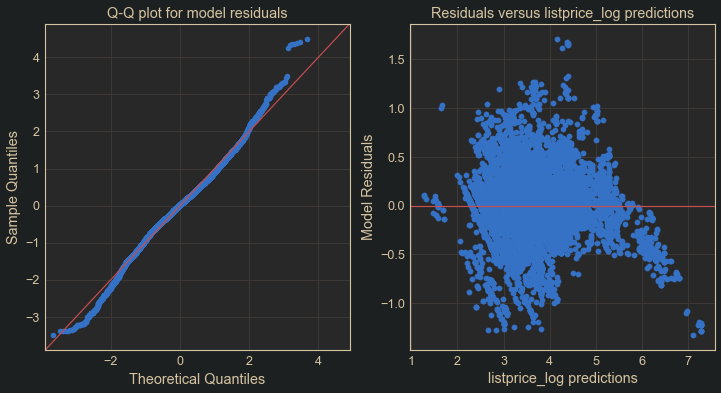

In [41]:
lm = mf.do_a_linreg(trimmed_train_df, new_significant, 'listprice_log')

In [42]:
# Now to remove multicolinearity
X = trimmed_train_df[new_significant].copy()
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs = list(zip(new_significant, vif))
high_vifs = [x for x in vifs if x[1] > 5]
high_vifs

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('ages16andup', 6.19172376716167),
 ('ages5andup', inf),
 ('themenameMinifigures', inf),
 ('themenameClassic', inf),
 ('ages4to99', inf),
 ('themenameCity', 5.285552615330383)]

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  reviewdifficultyChallenging    with p-value 0.0
Add  reviewdifficultyAverage        with p-value 0.0
Add  piececount                     with p-value 0.0
Add  themenameBrickHeadz            with p-value 2.6925e-91
Add  valstarrating                  with p-value 2.30102e-68
Add  reviewdifficultyVeryEasy       with p-value 3.76452e-75
Add  ages6to14                      with p-value 2.21325e-43
Add  ages5to12                      with p-value 4.60706e-49
Add  ages1andahalfto3               with p-value 1.73748e-51
Add  themenameCreator3in1           with p-value 6.6874e-40
Add  ages7to14                      with p-value 5.29201e-39
Add  ages6andup                     with p-value 5.68257e-40
Add  ages6to12                      with p-value 8.4329e-44
Add  ages4to7                       with p-value 1.10393e-48
Add  countryCA                      with p-value 2.17573e-43
Add  countryUS                      with p-value 1.47109e-44
Add  playstarrating                 with p-value 1.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          listprice_log   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     518.4
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:45:47   Log-Likelihood:                -4717.5
No. Observations:                8046   AIC:                             9537.
Df Residuals:                    7995   BIC:                             9894.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.7600      0.013    279.340      0.000       3.734       3.786
reviewdifficultyChallenging                    0.3781      0.025     15.302      0.000       0.330       0.427
reviewdifficultyAverage                        0.3652      0.013     28.049      0.000       0.340       0.391
piececount                                     0.5514      0.009     63.283      0.000       0.534       0.568
themenameBrickHeadz                           -0.5487      0.029    -18.820      0.000      -0.606      -0.492
valstarrating                                 -0.1472      0.006    -23.863      0.000      -0.159      -0.135
reviewdifficultyVeryEasy                      -0.3828      0.019    -20.009      0.000      -0.420      -0.345
ages6to14                                     -0.8148      0.039    -20.757      0.000      -0.892      -0.738
ages5to12                                     -0.4195      0.021    -19.837      0.000      -0.461      -0.378
ages1andahalfto3                              -0.7135      0.038    -18.927      0.000      -0.787      -0.640
themenameCreator3in1                          -0.6118      0.033    -18.729      0.000      -0.676      -0.548
ages7to14                                     -0.2270      0.019    -11.740      0.000      -0.265      -0.189
ages6andup                                    -0.9735      0.068    -14.346      0.000      -1.106      -0.840
ages6to12                                     -0.1372      0.022     -6.365      0.000      -0.179      -0.095
ages4to7                                      -0.2840      0.025    -11.520      0.000      -0.332      -0.236
countryCA                                     -0.3199      0.020    -15.990      0.000      -0.359      -0.281
countryUS                                     -0.2879      0.019    -14.798      0.000      -0.326      -0.250
playstarrating                                 0.0806      0.007     12.384      0.000       0.068       0.093
themenameCreatorExpert                        -0.2884      0.037     -7.741      0.000      -0.361      -0.215
themenameElves                                -0.6014      0.047    -12.870      0.000      -0.693      -0.510
ages8to12                                      0.4850      0.039     12.558      0.000       0.409       0.561
ages9to14                                      0.3480      0.029     12.109      0.000       0.292       0.404
ages10to21                                     0.3842      0.039      9.895      0.000       0.308       0.460
ages10to16                                     0.5333      0.047     11.416      0.000       0.442       0.625
ages7to12                                      0.2009      0.030      6.801      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.729606,5.11594e-21


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 2.069016e-01 
 9.809881e-01 
 
 
 p-value 
 1.343895e-299 
 1.909492e-31 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 36.656065 
 0.787

Skew: -0.33357990336968263
Kurtosis: 1.6333000835092202


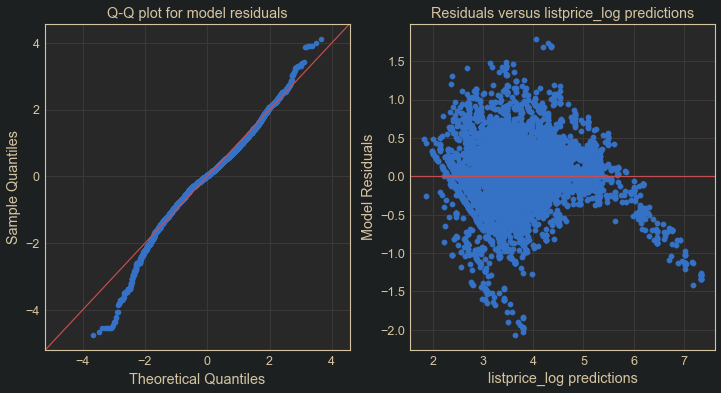

In [44]:
remove = [x[0] for x in high_vifs]
new_significant = [x for x in new_significant if x not in remove]
X = trimmed_train_df[new_significant].copy()
y = trimmed_train_df['listprice_log'].copy()
new_significant = mf.stepwise_selection(X, y, threshold_in=0.05)
lm = mf.do_a_linreg(trimmed_train_df, new_significant, 'listprice_log')

In [45]:
# Your code here - Check normality assumption
# As shown from the output of the function above, the null hypothesis of normally distributed
# residuals is still rejected by the Anderson-Darling and Shapiro-Wilk tests, but the normality
# has improved dramatically as compared to before the transformation and outlier removal, 
# evidenced by the much improved look of the Q-Q plot of the residuals. This regression's
# residuals could be considered normal enough for many purposes
# The issues in the model seem to be at the low and high end of list prices, where the predictions
# tend toward overestimation and underestimation, respectively.

In [46]:
# Your code here - Check the Homoscedasticity Assumption
# The null hypothesis of homoscedastic residuals is rejected by the Goldfeld-Quandt test,
# indicating that the assumption is not satisfied

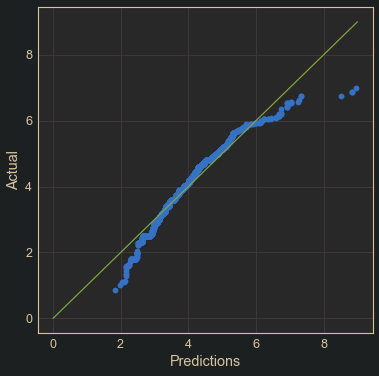

In [49]:
# A look at predictive accuracy for the test data
predictions = sorted(lm.predict(X_test[new_significant]))
actual = sorted(np.log(y_test))
plt.figure(figsize=(6,6))
plt.plot([0,9], [0,9], c='g')
plt.scatter(predictions, actual)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [50]:
# We can see that the errors between the predicted and actual are worst at the high end, like 
# with the training data.

In [51]:
ss_tot = sum((np.log(y_test) - np.log(y_test).mean())**2)
ss_res = sum((np.log(y_test) - np.array(lm.predict(X_test[new_significant]))) ** 2)
r_squared = 1 - (ss_res/ss_tot)
print("R_squared for test data:", r_squared)

R_squared for test data: 0.7486596948402394


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  reviewdifficultyChallenging    with p-value 0.0
Add  reviewdifficultyAverage        with p-value 0.0
Add  piececount                     with p-value 0.0
Add  reviewdifficultyVeryEasy       with p-value 1.22784e-93
Add  valstarrating                  with p-value 6.9059e-100
Add  ages2to5                       with p-value 5.77651e-72
Add  themenameMINDSTORMS            with p-value 5.55438e-61
Add  ages16andup                    with p-value 6.98252e-54
Add  themenameBrickHeadz            with p-value 9.83325e-51
Add  themenameClassic               with p-value 1.24712e-48
Add  ages5andup                     with p-value 9.34058e-53
Add  themenameMinifigures           with p-value 9.34058e-53
Add  ages6to14                      with p-value 5.46057e-43
Add  ages5to12                      with p-value 1.38536e-47
Add  ages1andahalfto3               with p-value 1.13628e-49
Add  themenameCity                  with p-value 8.23263e-46
Add  ages6to12                      with p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          listprice_log   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     599.8
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:55:27   Log-Likelihood:                -3921.8
No. Observations:                8152   AIC:                             7976.
Df Residuals:                    8086   BIC:                             8438.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.9353      0.014    283.392      0.000       3.908       3.963
reviewdifficultyChallenging                    0.3557      0.022     16.040      0.000       0.312       0.399
reviewdifficultyAverage                        0.2720      0.012     22.730      0.000       0.249       0.295
piececount                                     0.4818      0.008     56.759      0.000       0.465       0.498
reviewdifficultyVeryEasy                      -0.2060      0.018    -11.503      0.000      -0.241      -0.171
valstarrating                                 -0.1067      0.007    -15.184      0.000      -0.120      -0.093
themenameMINDSTORMS                            0.1501      0.030      4.941      0.000       0.091       0.210
ages16andup                                   -0.6882      0.055    -12.438      0.000      -0.797      -0.580
themenameBrickHeadz                           -0.7650      0.028    -27.731      0.000      -0.819      -0.711
themenameClassic                              -1.0523      0.036    -29.209      0.000      -1.123      -0.982
ages5andup                                    -0.9448      0.034    -27.825      0.000      -1.011      -0.878
themenameMinifigures                          -0.9448      0.034    -27.825      0.000      -1.011      -0.878
ages6to14                                     -1.0637      0.037    -29.061      0.000      -1.135      -0.992
ages5to12                                     -1.4747      0.036    -40.775      0.000      -1.546      -1.404
ages1andahalfto3                              -0.9216      0.035    -26.654      0.000      -0.989      -0.854
themenameCity                                  0.9087      0.033     27.778      0.000       0.845       0.973
ages6to12                                     -0.8198      0.028    -29.239      0.000      -0.875      -0.765
ages7to14                                     -0.5434      0.022    -24.732      0.000      -0.587      -0.500
themenameCreator3in1                          -0.2013      0.034     -5.851      0.000      -0.269      -0.134
ages4to7                                      -0.4969      0.023    -21.514      0.000      -0.542      -0.452
countryCA                                     -0.3194      0.018    -17.571      0.000      -0.355      -0.284
countryUS                                     -0.2902      0.018    -16.390      0.000      -0.325      -0.255
ages4andup                                    -1.2399      0.068    -18.192      0.000      -1.374      -1.106
playstarrating                                 0.0927      0.007     13.588      0.000       0.079       0.106
themenameElves                                -0.1552      0.046     -3.380      0.001

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,1.12483,0.000409819


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 0.221969 
 9.915034e-01 
 
 
 p-value 
 0.000000 
 1.078680e-21 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 19.218515 
 0.787

Skew: 0.026807953303762025
Kurtosis: 0.8320688142907708


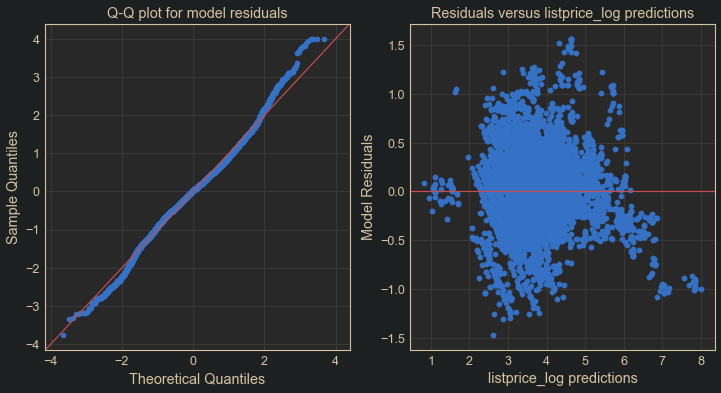

In [52]:
# Since the earlier removal of the outliers did not have a huge benefit to the normality of the
# target variable, I am curious to see how the model would perform if the outliers had not been
# removed, but keeping the log transformation.
features = [x for x in train_df.columns if x not in ['listprice_log',
                                                     'listprice',
                                                     'listprice_sqrt',
                                                     'listprice_4rt']]
X = train_df[features].copy()
y = train_df['listprice_log'].copy()
signif = mf.stepwise_selection(X, y, threshold_in=0.05)
lm = mf.do_a_linreg(train_df, signif, 'listprice_log')

In [53]:
# Now to remove multicolinearity
X = train_df[signif].copy()
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs = list(zip(signif, vif))
high_vifs = [x for x in vifs if x[1] > 5]
high_vifs

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('ages16andup', 6.138198529006517),
 ('themenameClassic', inf),
 ('ages5andup', inf),
 ('themenameMinifigures', inf),
 ('ages5to12', 5.2277788278284465),
 ('themenameCity', 5.593704957683394),
 ('ages6to12', 5.185293268879618),
 ('ages4andup', inf),
 ('ages4to99', inf)]

In [54]:
# Your code here - Subset features based on multicollinearity
remove = [x[0] for x in high_vifs]
newest_features = [x for x in signif if x not in remove]

Linear Regression for listprice_log~reviewdifficultyChallenging+reviewdifficultyAverage+piececount+reviewdifficultyVeryEasy+valstarrating+themenameMINDSTORMS+themenameBrickHeadz+ages6to14+ages1andahalfto3+ages7to14+themenameCreator3in1+ages4to7+countryCA+countryUS+playstarrating+themenameElves+ages6andup+themenameSERIOUSPLAY+themenameDisney+themenameMarvelSuperHeroes+ages1andahalfto5+themenameCreatorExpert+ages9to14+countryDN+reviewdifficultyVeryChallenging+ages10to16+countryFI+themenameDCComicsSuperHeroes+themenameIndoraptorRampageatLockwoodEstate+themenameCarnotaurusGyrosphereEscape+themenameBOOST+themenameFriends+countryNO+ages7to12+themenameTrexTransport+themenameJurassicParkVelociraptorChase+themenameTHELEGOBATMANMOVIE+themenameStygimolochBreakout+numreviews+themenameDilophosaurusOutpostAttack+themenameBluesHelicopterPursuit+themenameStarWars+ages8to14+starrating+countryAU+ages9to16+themenameDIMENSIONS+themenamePteranodonChase+ages12to16+ages9to12+themenameTHELEGONINJAGOMOVIE+ages

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          listprice_log   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     442.6
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        12:58:14   Log-Likelihood:                -5279.8
No. Observations:                8152   AIC:                         1.068e+04
Df Residuals:                    8093   BIC:                         1.109e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.6066      0.013    288.470      0.000       3.582       3.631
reviewdifficultyChallenging                    0.5044      0.026     19.465      0.000       0.454       0.555
reviewdifficultyAverage                        0.4054      0.014     29.483      0.000       0.378       0.432
piececount                                     0.5051      0.008     60.605      0.000       0.489       0.521
reviewdifficultyVeryEasy                      -0.4577      0.020    -22.779      0.000      -0.497      -0.418
valstarrating                                 -0.1381      0.008    -16.835      0.000      -0.154      -0.122
themenameMINDSTORMS                            0.4804      0.034     14.096      0.000       0.414       0.547
themenameBrickHeadz                           -0.3984      0.031    -12.919      0.000      -0.459      -0.338
ages6to14                                     -0.6401      0.041    -15.460      0.000      -0.721      -0.559
ages1andahalfto3                              -0.5895      0.039    -15.025      0.000      -0.666      -0.513
ages7to14                                     -0.0742      0.021     -3.463      0.001      -0.116      -0.032
themenameCreator3in1                          -0.6437      0.034    -19.167      0.000      -0.710      -0.578
ages4to7                                      -0.1528      0.025     -6.154      0.000      -0.202      -0.104
countryCA                                     -0.3440      0.021    -16.055      0.000      -0.386      -0.302
countryUS                                     -0.3041      0.021    -14.556      0.000      -0.345      -0.263
playstarrating                                 0.0827      0.008     10.333      0.000       0.067       0.098
themenameElves                                -0.6445      0.049    -13.127      0.000      -0.741      -0.548
ages6andup                                    -0.8151      0.070    -11.654      0.000      -0.952      -0.678
themenameSERIOUSPLAY                           1.4586      0.096     15.219      0.000       1.271       1.646
themenameDisney                                0.0853      0.036      2.375      0.018       0.015       0.156
themenameMarvelSuperHeroes                     0.0774      0.029      2.671      0.008       0.021       0.134
ages1andahalfto5                              -0.0646      0.051     -1.265      0.206      -0.165       0.035
themenameCreatorExpert                        -0.0221      0.038     -0.584      0.559      -0.096       0.052
ages9to14                                      0.5270      0.031     16.783      0.000       0.465       0.589
countryDN                                     -0.1661      0.026     -6.506      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.796132,7.48476e-12


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 1.913198e-01 
 9.871809e-01 
 
 
 p-value 
 1.327001e-259 
 1.623140e-26 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 29.44973 
 0.787

Skew: -0.23264081722667673
Kurtosis: 1.1034857783854548


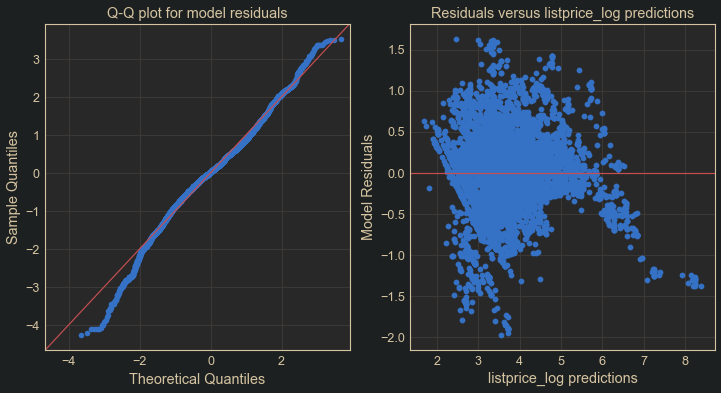

In [55]:
lm = mf.do_a_linreg(train_df, newest_features, 'listprice_log')

In [56]:
# We can see that the removal of the colinear features has raised the p-values of some of the
# other features again, making them not significant. Another round of stepwise selection can
# fix this
X = train_df[newest_features].copy()
y = train_df['listprice_log'].copy()
new_signif = mf.stepwise_selection(X, y, threshold_in=0.05)

c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  reviewdifficultyChallenging    with p-value 0.0
Add  reviewdifficultyAverage        with p-value 0.0
Add  piececount                     with p-value 0.0
Add  reviewdifficultyVeryEasy       with p-value 1.22784e-93
Add  valstarrating                  with p-value 6.9059e-100
Add  playstarrating                 with p-value 4.62043e-66
Add  ages6to14                      with p-value 8.52567e-45
Add  themenameMINDSTORMS            with p-value 3.21742e-39
Add  countryCA                      with p-value 7.69604e-37
Add  ages1andahalfto3               with p-value 1.34307e-37
Add  countryUS                      with p-value 1.02208e-36
Add  ages9to14                      with p-value 3.33325e-36
Add  ages8to14                      with p-value 1.19208e-35
Add  themenameBrickHeadz            with p-value 7.11459e-33
Add  ages10to16                     with p-value 1.14911e-27
Add  themenameCreator3in1           with p-value 2.16646e-22
Add  ages7to12                      with p-value

Linear Regression for listprice_log~reviewdifficultyChallenging+reviewdifficultyAverage+piececount+reviewdifficultyVeryEasy+valstarrating+playstarrating+ages6to14+themenameMINDSTORMS+countryCA+ages1andahalfto3+countryUS+ages9to14+ages8to14+themenameBrickHeadz+ages10to16+themenameCreator3in1+ages7to12+ages8to12+themenameElves+ages9to12+themenameSERIOUSPLAY+ages6andup+reviewdifficultyVeryChallenging+ages9to16+themenameFriends+countryFI+countryDN+ages4to7+ages7to14+countryNO+themenameCarnotaurusGyrosphereEscape+themenameTechnic+ages11to16+themenameBOOST+themenameTrexTransport+themenameIndoraptorRampageatLockwoodEstate+themenameTHELEGONINJAGOMOVIE+themenameStarWars+countryAU+themenameMarvelSuperHeroes+themenameDisney+themenamePteranodonChase+ages12to16+countryCH+themenameBluesHelicopterPursuit+themenameDilophosaurusOutpostAttack


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          listprice_log   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     557.2
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        13:02:17   Log-Likelihood:                -5288.7
No. Observations:                8152   AIC:                         1.067e+04
Df Residuals:                    8105   BIC:                         1.100e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      3.5967      0.011    315.698      0.000       3.574       3.619
reviewdifficultyChallenging                    0.5026      0.025     19.928      0.000       0.453       0.552
reviewdifficultyAverage                        0.4105      0.014     30.259      0.000       0.384       0.437
piececount                                     0.5043      0.007     67.400      0.000       0.490       0.519
reviewdifficultyVeryEasy                      -0.4592      0.020    -22.906      0.000      -0.499      -0.420
valstarrating                                 -0.1390      0.007    -21.062      0.000      -0.152      -0.126
playstarrating                                 0.0809      0.007     11.725      0.000       0.067       0.094
ages6to14                                     -0.6394      0.041    -15.497      0.000      -0.720      -0.559
themenameMINDSTORMS                            0.4798      0.034     14.157      0.000       0.413       0.546
countryCA                                     -0.3344      0.021    -15.820      0.000      -0.376      -0.293
ages1andahalfto3                              -0.5900      0.039    -15.099      0.000      -0.667      -0.513
countryUS                                     -0.2942      0.021    -14.278      0.000      -0.335      -0.254
ages9to14                                      0.5304      0.031     17.353      0.000       0.470       0.590
ages8to14                                      0.3038      0.021     14.155      0.000       0.262       0.346
themenameBrickHeadz                           -0.4021      0.030    -13.494      0.000      -0.461      -0.344
ages10to16                                     0.7105      0.051     13.904      0.000       0.610       0.811
themenameCreator3in1                          -0.6456      0.033    -19.393      0.000      -0.711      -0.580
ages7to12                                      0.3568      0.028     12.835      0.000       0.302       0.411
ages8to12                                      0.6450      0.039     16.722      0.000       0.569       0.721
themenameElves                                -0.6474      0.049    -13.211      0.000      -0.743      -0.551
ages9to12                                      0.8555      0.092      9.315      0.000       0.675       1.036
themenameSERIOUSPLAY                           1.4616      0.095     15.466      0.000       1.276       1.647
ages6andup                                    -0.8160      0.070    -11.690      0.000      -0.953      -0.679
reviewdifficultyVeryChallenging                1.2165      0.127      9.606      0.000       0.968       1.465
ages9to16                                      0.6612      0.066     10.016      0.000

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.760322,1.73553e-16


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


c:\users\indez\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 1.914659e-01 
 9.873357e-01 
 
 
 p-value 
 5.331005e-260 
 2.292084e-26 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 29.055128 
 0.787

Skew: -0.23762949700497246
Kurtosis: 1.0903441302206849


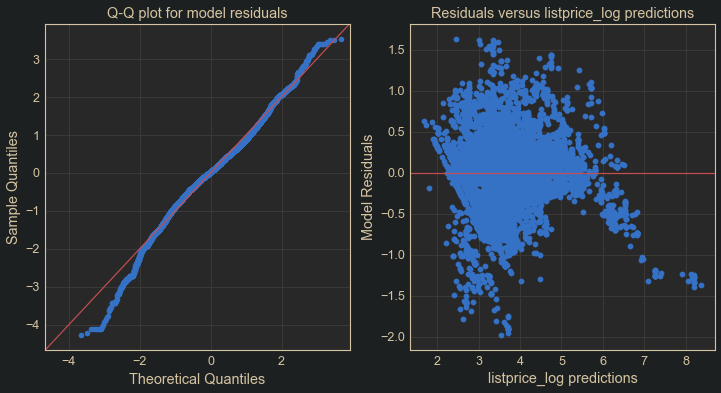

In [57]:
lm = mf.do_a_linreg(train_df, new_signif, 'listprice_log')

In [ ]:
# We can see that leaving the outliers in has had a very slight negative effect on the model
# accuracy

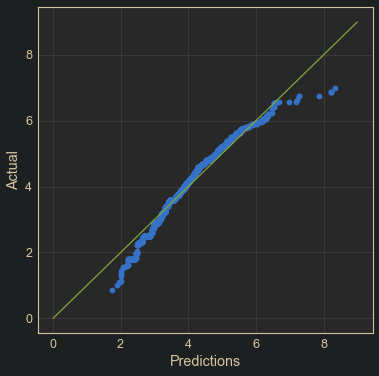

In [62]:
# A look at predictive accuracy for the test data
predictions = sorted(lm.predict(X_test[new_signif]))
actual = sorted(np.log(y_test))
plt.figure(figsize=(6,6))
plt.plot([0,9], [0,9], c='g')
plt.scatter(predictions, actual)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [59]:
ss_tot = sum((np.log(y_test) - np.log(y_test).mean())**2)
ss_res = sum((np.log(y_test) - np.array(lm.predict(X_test[new_signif]))) ** 2)
r_squared = 1 - (ss_res/ss_tot)
print("R_squared for test data:", r_squared)

R_squared for test data: 0.7510308541521682


In [ ]:
# Oddly enough, this regression that had the outliers left in, though suffering a very small
# negative impact on r squared for the training data, has actually seen a small improvement
# in r squared for the testing data. The testing data has not had outliers removed, so the
# model may have been better suited for extreme values since it was trained with them.

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 